In [20]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 87 kB/s 


In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from scipy import stats, special
from mpl_toolkits import mplot3d

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

%config InlineBackend.figure_format = 'svg'
pd.set_option('display.max_columns', None)

Mounted at /content/drive


In [46]:
df = pd.read_csv('/content/drive/MyDrive/Quant_Finance/Machine_Learning/DataSoc Workshops/tiktok.csv', parse_dates=['release_date'])
df

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist_id,playlist_name,duration_mins,genre
0,6kVuF2PYLuvl9T85XjNbaO,Lay It Down Gmix - Main,1Xfmvd48oOhEWkscWyEbh9,Lloyd,43C6GVlhXG4KfZuEbxty3r,302186,2011-01-01,28,0.597,0.800,1,-5.423,0,0.3120,0.0461,0.000000,0.1800,0.565,155.932,6kVuF2PYLuvl9T85XjNbaO,6kVuF2PYLuvl9T85XjNbaO,5.036433,TIKTOK DANCE
1,1RGIjMFMgJxkZHMDXVYzOJ,Bartender (feat. Akon),3aQeKQSyrW4qWr35idm0cy,T-Pain,6CrSEKCF4TYrbSIitegb3h,238800,2007-06-05,75,0.832,0.391,8,-8.504,1,0.0628,0.0564,0.000000,0.2240,0.436,104.961,1RGIjMFMgJxkZHMDXVYzOJ,1RGIjMFMgJxkZHMDXVYzOJ,3.980000,TIKTOK DANCE
2,1dIWPXMX4kRHj6Dt2DStUQ,Chosen (feat. Ty Dolla $ign),4qXC0i02bSFstECuXP2ZpL,Blxst,7AwrgenNcTAJlJF3pKL0Qr,161684,2020-12-04,76,0.571,0.767,2,-5.160,1,0.2870,0.3360,0.000000,0.0809,0.605,93.421,1dIWPXMX4kRHj6Dt2DStUQ,1dIWPXMX4kRHj6Dt2DStUQ,2.694733,TIKTOK DANCE
3,4QVS8YCpK71R4FsxSMCjhP,Tie Me Down (with Elley Duhé),2ZRQcIgzPCVaT9XKhXZIzh,Gryffin,69t8rpgBN1ov5kCU6LDMuR,218295,2018-08-03,72,0.548,0.839,6,-2.371,1,0.0644,0.1350,0.000000,0.1020,0.314,98.932,4QVS8YCpK71R4FsxSMCjhP,4QVS8YCpK71R4FsxSMCjhP,3.638250,TIKTOK DANCE
4,7BoobGhD4x5K96Me0hqC8Q,Build a Bitch,26cMerAxjx9GedFt0lMDjm,Bella Poarch,5YKqfiQdPYWJ0kZ5pttY5o,122772,2021-05-14,89,0.855,0.463,3,-7.454,1,0.0367,0.2170,0.000018,0.3470,0.866,102.931,7BoobGhD4x5K96Me0hqC8Q,7BoobGhD4x5K96Me0hqC8Q,2.046200,TIKTOK DANCE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,03f7xZmt2wHCIDJBFPK8G4,Soap,63yrD80RY3RNEM2YDpUpO8,Melanie Martinez,5JpH5T1sCYnUyZD6TM0QaY,209426,2015-08-14,68,0.595,0.689,6,-6.107,0,0.1480,0.2540,0.000005,0.1290,0.213,168.112,1uOzLrMZoqPIIctv9m48L0,TikTok Trending Philippines: It Really Hurts Gagong Rapper Kabet • M to the B • Binibining Marikit,3.490433,_TIKTOK
3556,4kIpBfvK44bxqX7zo8K1oP,시작,3ybZTNrlK0QhL4rBxfLHOc,Gaho,4AgCiUejVvU6729YAJwRH9,202440,2020-02-01,67,0.591,0.818,4,-3.532,1,0.0730,0.1720,0.000000,0.1260,0.574,108.107,1uOzLrMZoqPIIctv9m48L0,TikTok Trending Philippines: It Really Hurts Gagong Rapper Kabet • M to the B • Binibining Marikit,3.374000,_TIKTOK
3557,1lNHWPDvKEbamKezpLq7HW,no song without you,0Vw76uk7P8yVtTClWyOhac,HONNE,3DG5MS8iKYcJROCnb1DYDf,160346,2020-07-03,64,0.788,0.473,0,-12.744,1,0.0328,0.4890,0.254000,0.1090,0.810,105.429,1uOzLrMZoqPIIctv9m48L0,TikTok Trending Philippines: It Really Hurts Gagong Rapper Kabet • M to the B • Binibining Marikit,2.672433,_TIKTOK
3558,7gd01LMH2gBcoDngSt8sq9,Next To You (feat. Justin Bieber),7bXgB6jMjp9ATFy66eO08Z,Chris Brown,6df0qvkMXoyHGt9J8cujZb,265813,2011-03-22,70,0.670,0.676,8,-4.725,1,0.0370,0.0201,0.000000,0.1100,0.349,114.974,1uOzLrMZoqPIIctv9m48L0,TikTok Trending Philippines: It Really Hurts Gagong Rapper Kabet • M to the B • Binibining Marikit,4.430217,_TIKTOK


## Count Plots

In [47]:
class EDA:
    def __init__(self, dataset):
        self.dataset = dataset

    def plot_top_k(self, col, k, colour='lime', edgecolour='black'):
        self.dataset[col].value_counts(normalize=False)[:k].plot(kind='bar', 
                                                                 color=colour, 
                                                                 title=f'Top {k} most occuring values: {col}',
                                                                 edgecolor=edgecolour)
        
    def plot_correlation_heatmap(self):
        fig, ax = plt.subplots(figsize=(10, 10))
        mask = np.triu(np.ones_like(self.dataset.corr(), dtype=bool))
        return sns.heatmap(self.dataset.corr(),
                            mask=mask, 
                            ax=ax,
                            cmap='viridis', 
                            vmax=.3, 
                            center=0,
                            square=True, 
                            linewidths=.5, 
                            cbar_kws={"shrink": .5})
    

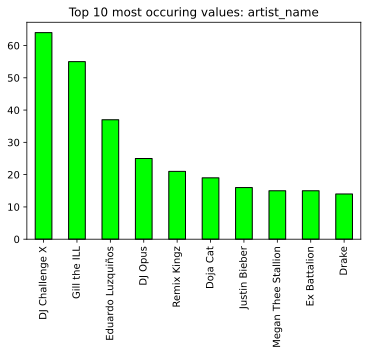

In [48]:
eda = EDA(dataset=df)

eda.plot_top_k('artist_name', 10)

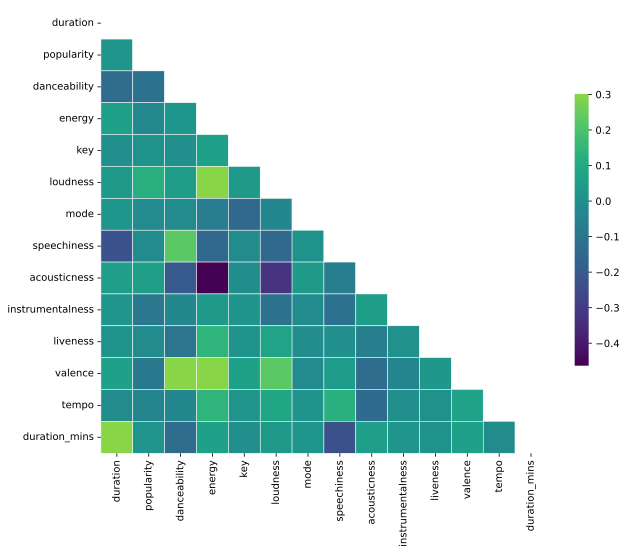

In [49]:
eda.plot_correlation_heatmap();

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [51]:
df

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist_id,playlist_name,duration_mins,genre
0,6kVuF2PYLuvl9T85XjNbaO,Lay It Down Gmix - Main,1Xfmvd48oOhEWkscWyEbh9,Lloyd,43C6GVlhXG4KfZuEbxty3r,302186,2011-01-01,28,0.597,0.800,1,-5.423,0,0.3120,0.0461,0.000000,0.1800,0.565,155.932,6kVuF2PYLuvl9T85XjNbaO,6kVuF2PYLuvl9T85XjNbaO,5.036433,TIKTOK DANCE
1,1RGIjMFMgJxkZHMDXVYzOJ,Bartender (feat. Akon),3aQeKQSyrW4qWr35idm0cy,T-Pain,6CrSEKCF4TYrbSIitegb3h,238800,2007-06-05,75,0.832,0.391,8,-8.504,1,0.0628,0.0564,0.000000,0.2240,0.436,104.961,1RGIjMFMgJxkZHMDXVYzOJ,1RGIjMFMgJxkZHMDXVYzOJ,3.980000,TIKTOK DANCE
2,1dIWPXMX4kRHj6Dt2DStUQ,Chosen (feat. Ty Dolla $ign),4qXC0i02bSFstECuXP2ZpL,Blxst,7AwrgenNcTAJlJF3pKL0Qr,161684,2020-12-04,76,0.571,0.767,2,-5.160,1,0.2870,0.3360,0.000000,0.0809,0.605,93.421,1dIWPXMX4kRHj6Dt2DStUQ,1dIWPXMX4kRHj6Dt2DStUQ,2.694733,TIKTOK DANCE
3,4QVS8YCpK71R4FsxSMCjhP,Tie Me Down (with Elley Duhé),2ZRQcIgzPCVaT9XKhXZIzh,Gryffin,69t8rpgBN1ov5kCU6LDMuR,218295,2018-08-03,72,0.548,0.839,6,-2.371,1,0.0644,0.1350,0.000000,0.1020,0.314,98.932,4QVS8YCpK71R4FsxSMCjhP,4QVS8YCpK71R4FsxSMCjhP,3.638250,TIKTOK DANCE
4,7BoobGhD4x5K96Me0hqC8Q,Build a Bitch,26cMerAxjx9GedFt0lMDjm,Bella Poarch,5YKqfiQdPYWJ0kZ5pttY5o,122772,2021-05-14,89,0.855,0.463,3,-7.454,1,0.0367,0.2170,0.000018,0.3470,0.866,102.931,7BoobGhD4x5K96Me0hqC8Q,7BoobGhD4x5K96Me0hqC8Q,2.046200,TIKTOK DANCE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,03f7xZmt2wHCIDJBFPK8G4,Soap,63yrD80RY3RNEM2YDpUpO8,Melanie Martinez,5JpH5T1sCYnUyZD6TM0QaY,209426,2015-08-14,68,0.595,0.689,6,-6.107,0,0.1480,0.2540,0.000005,0.1290,0.213,168.112,1uOzLrMZoqPIIctv9m48L0,TikTok Trending Philippines: It Really Hurts Gagong Rapper Kabet • M to the B • Binibining Marikit,3.490433,_TIKTOK
3556,4kIpBfvK44bxqX7zo8K1oP,시작,3ybZTNrlK0QhL4rBxfLHOc,Gaho,4AgCiUejVvU6729YAJwRH9,202440,2020-02-01,67,0.591,0.818,4,-3.532,1,0.0730,0.1720,0.000000,0.1260,0.574,108.107,1uOzLrMZoqPIIctv9m48L0,TikTok Trending Philippines: It Really Hurts Gagong Rapper Kabet • M to the B • Binibining Marikit,3.374000,_TIKTOK
3557,1lNHWPDvKEbamKezpLq7HW,no song without you,0Vw76uk7P8yVtTClWyOhac,HONNE,3DG5MS8iKYcJROCnb1DYDf,160346,2020-07-03,64,0.788,0.473,0,-12.744,1,0.0328,0.4890,0.254000,0.1090,0.810,105.429,1uOzLrMZoqPIIctv9m48L0,TikTok Trending Philippines: It Really Hurts Gagong Rapper Kabet • M to the B • Binibining Marikit,2.672433,_TIKTOK
3558,7gd01LMH2gBcoDngSt8sq9,Next To You (feat. Justin Bieber),7bXgB6jMjp9ATFy66eO08Z,Chris Brown,6df0qvkMXoyHGt9J8cujZb,265813,2011-03-22,70,0.670,0.676,8,-4.725,1,0.0370,0.0201,0.000000,0.1100,0.349,114.974,1uOzLrMZoqPIIctv9m48L0,TikTok Trending Philippines: It Really Hurts Gagong Rapper Kabet • M to the B • Binibining Marikit,4.430217,_TIKTOK


In [52]:
cols = ['artist_name', 
        'duration_mins', 
        'release_date',
        'popularity',
        'danceability',
        'energy',
        'loudness',
        'speechiness',
        'acousticness',
        'instrumentalness',
        'liveness',
        'valence',
        'tempo']

df = df[cols].copy()

Make prediction based of artist name

In [55]:
df_new = df.groupby('artist_name').mean().reset_index().copy()

In [56]:
df_new

,artist_name,duration_mins,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,$NOT,2.097550,72.0,0.844,0.720,-7.418,0.3000,0.1690,0.000000,0.0797,0.631,99.917
1,$uicideboy$,2.808150,37.0,0.792,0.512,-6.875,0.0408,0.1300,0.000088,0.1400,0.110,113.978
2,$wave,1.934367,42.0,0.935,0.336,-12.571,0.3870,0.0632,0.000000,0.0649,0.837,132.013
3,.swimwhere,2.456683,51.0,0.854,0.900,-5.957,0.0478,0.1840,0.000172,0.0680,0.981,127.016
4,03 Greedo,3.663900,72.0,0.599,0.320,-13.716,0.0787,0.2580,0.000000,0.1060,0.197,70.996
...,...,...,...,...,...,...,...,...,...,...,...,...
2081,小潘潘,3.486967,55.0,0.832,0.840,-4.937,0.0296,0.1970,0.000135,0.1430,0.926,115.040
2082,物語シリーズ,4.250667,71.0,0.814,0.785,-5.679,0.0396,0.0524,0.001110,0.1110,0.941,120.009
2083,稲葉曇,3.408283,73.0,0.721,0.918,-3.347,0.0678,0.0408,0.000024,0.2330,0.965,137.030
2084,美波,4.198883,73.0,0.541,0.846,-2.729,0.0551,0.0122,0.000149,0.1630,0.524,129.138


In [57]:
X = df.drop(['release_date', 'popularity'], axis=1)
y = df.popularity

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [59]:
import catboost

In [66]:
from google.colab import output
output.enable_custom_widget_manager()

In [68]:
cbst_model = catboost.CatBoostRegressor(cat_features=['artist_name']).fit(X_train, y_train, verbose=0)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [71]:
dir(cbst_model)

['__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_base_calc_leaf_indexes',
 '_base_drop_unused_features',
 '_base_eval_metrics',
 '_base_predict',
 '_base_shrink',
 '_base_virtual_ensembles_predict',
 '_calc_fstr',
 '_calc_leaf_indexes',
 '_calc_ostr',
 '_check_is_compatible_loss',
 '_convert_to_asymmetric_representation',
 '_deserialize_model',
 '_estimator_type',
 '_eval_metrics',
 '_fit',
 '_get_borders',
 '_get_cat_feature_indices',
 '_get_default_prediction_type',
 '_get_embedding_feature_indices',
 '_get_float_feature_indices',
 '_get_nan_treatments',
 '_get_params',
 '_get_tags',
 '_get_text_feature